In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [40]:
image = mpimg.imread('solidWhiteCurve.jpg')
print('This image is: ', type(image), 
     'With dimensions: ', image.shape)
color_select = np.copy(image)

This image is:  <class 'numpy.ndarray'> With dimensions:  (540, 960, 3)


In [41]:
# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
print('ysize: ', ysize)
print('xsize: ', xsize)

ysize:  540
xsize:  960


Next define a color threshold in the variables red,threshold, green_threshold, and blue_threshold and populate rgb threshold with these values. This vector contains the minimum RGB values that I will allow in my selection.

In [42]:
# Define our color selection criteria
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

print('RGB threshold array is : ', rgb_threshold)

RGB threshold array is :  [0, 0, 0]


Use bitwise OR to select any pixels below the threshold and set them to zero. 
After that, all pixels that meet my color criterion will be retained, and those that do not will be blacked out.


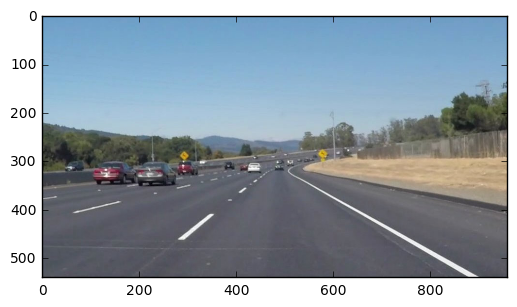

In [43]:
# Use a "bitwise OR" to identify pixels below the threshold
# thresholds = (image[:,:,0] < rgb_threshold[0]) \
#              | (image[:,:,1] < rgb_threshold[1]) \
#              | (image[:,:,2] < rgb_threshold[2])
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]
plt.imshow(color_select)


Now we would like to isolate the region of interest, particularly the triangle region at the bottom.

In [6]:
# Define a triangle region of interest
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note if you run this code you'll find these are not sensible values!!
# But you get a chance to play with them soon in a quiz
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

Polyfit returns a vector of coefficients p that minimizes the square error

In [7]:
# Fit lines (y = Ax+B) to identify the 3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
print('fit left: ', fit_left)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

fit left:  [  -1.3475  539.    ]


fit left:  [  -1.3475  539.    ]
fit right:  [   0.6 -240. ]
fit bottom:  [ -2.65555556e-01   5.39000000e+02]


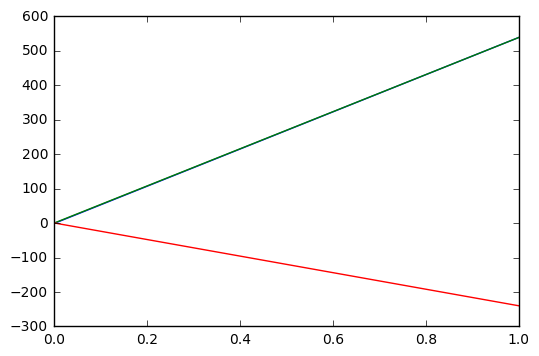

In [8]:
print('fit left: ', fit_left)
print('fit right: ', fit_right)
print('fit bottom: ', fit_bottom)

plt.plot(fit_left)
plt.plot(fit_bottom)
plt.plot(fit_right)

x size:  960
y size:  540
XX is:  (540, 960)
YY is :  (540, 960)


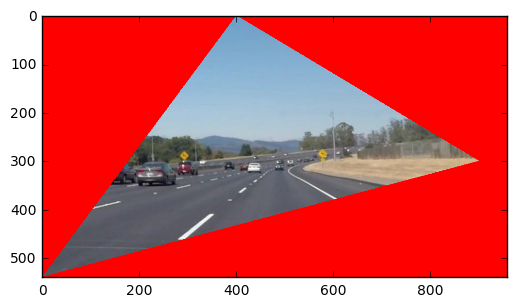

In [13]:
# Find the regions inside the lines
print('x size: ', xsize)
print('y size: ', ysize)
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
print('XX is: ', XX.shape)
print('YY is : ', YY.shape)
# region thresholds is a M x N matrix of booleans
region_thresholds = (YY > (fit_left[0]*XX + fit_left[1])) & \
                    (YY > (fit_right[0] * XX + fit_right[1])) & \
                    (YY < (fit_bottom[0] * XX + fit_bottom[1]))
# How do I plot my image the same way
region_select = np.copy(image)
region_select[~region_thresholds] = [255, 0, 0] #~ is negation on boolean indexing
plt.imshow(region_select)


<h1>Combining Color And Region Selections </h1>

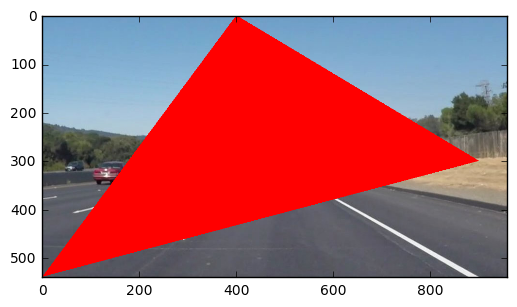

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Read in the image
image = mpimg.imread('solidWhiteCurve.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Perform a "bitwise or" to mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)